# Computer vision - Laboratory

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing
2. Edge detection

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 Image processing with different scales and filters

a) Read the image "face.png" and analyse its histogram. What is the histogram representing for an image?

- Visualize the R, G, and B channels of the image.

- Visualize the histogram of a color image with the following characteristics:

    - Obtain the histogram with 8, 32, 64 and 256 bins. 

    - Visualize the histogram of each channel and the gray level image and compare them. Comment their difference (see image bellow as an example of histogram extraction).

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

In [1]:
#all import neeeded
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from skimage import exposure as ex
from skimage import transform as tr
from skimage import color as col
from skimage import filters as filt
from skimage import feature as feat
from matplotlib import pyplot as plt
import scipy as sci
from scipy import ndimage
from skimage import data_dir
from matplotlib.animation import FuncAnimation
from time import sleep

%matplotlib inline

In [2]:
#auxiliar function for plot histogram by channel
def plot_histo_bychannel(histogram1,histogram2,histogram3):
    data1 = histogram1[0].astype(int)
    data2 = histogram2[0].astype(int)
    data3 = histogram3[0].astype(int)
    ind = np.arange(len(data1))
    
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, data1, width,
                    label='Red',color='r')
    rects2 = ax.bar(ind + width, data2, width,
                    label='Green',color='g')
    rects3 = ax.bar(ind + 2*width, data3, width,
                    label='Blue',color='b')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Num. of Ocurrence')
    ax.set_title('Histogram by Color Channel')
    ax.set_xticks(ind)
    ax.set_xticklabels(histogram1[1].astype(int))
    ax.legend()


    def autolabel(rects, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """

        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0, 'right': 1, 'left': -1}

        for rect in rects:
            height = rect.get_height()
            ax.annotate("",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 3),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom')


    autolabel(rects1, "left")
    autolabel(rects2, "center")
    autolabel(rects3, "right")
    plt.tight_layout()

    plt.show()

In [3]:
#auxiliar function for plot histogram of an image
def plot_histo(histogram):
    data = histogram[0].astype(int)
    ind = np.arange(len(data))
    
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, data, width,
                    label='Intensity',color='r')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Num. of Ocurrence')
    ax.set_title('Histogram')
    ax.set_xticks(ind)
    ax.set_xticklabels((histogram[1]*255).astype(int))
    ax.legend()


    def autolabel(rects, xpos='center'):
        """
        Attach a text label above each bar in *rects*, displaying its height.

        *xpos* indicates which side to place the text w.r.t. the center of
        the bar. It can be one of the following {'center', 'right', 'left'}.
        """

        ha = {'center': 'center', 'right': 'left', 'left': 'right'}
        offset = {'center': 0, 'right': 1, 'left': -1}

        for rect in rects:
            height = rect.get_height()
            ax.annotate("",
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 3),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom')


    autolabel(rects1, "left")

    plt.show()    

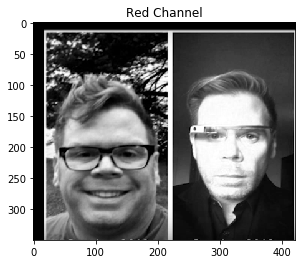

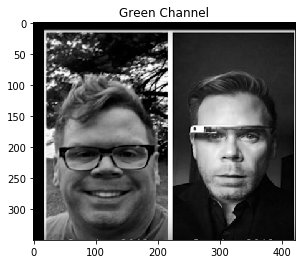

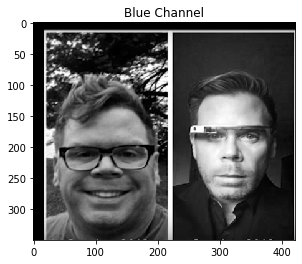

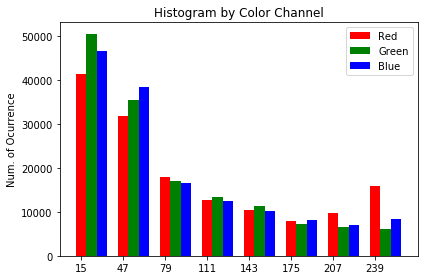

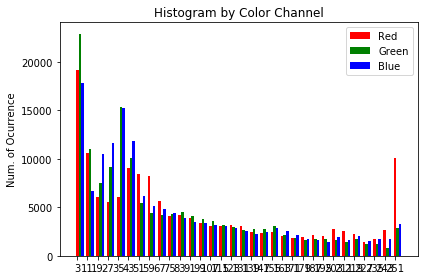

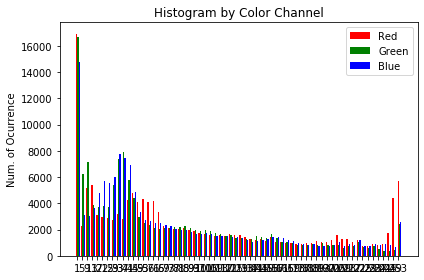

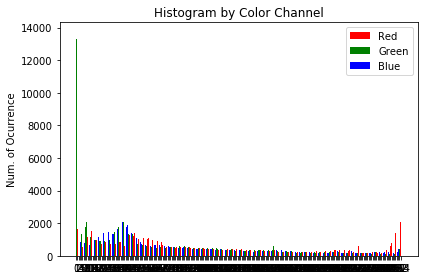

In [4]:

im = io.imread("images/face.png").astype(float)#load image
#extract every channel
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

#plot every channel in grayscale
plt.title('Red Channel')
plt.imshow(r,cmap='gray')
plt.show()

plt.title('Green Channel')
plt.imshow(g,cmap='gray')
plt.show()

plt.title('Blue Channel')
plt.imshow(b,cmap='gray')
plt.show()

#create histogram of every channel using differents bins
red_8 = np.asarray(ex.histogram(r,8))
green_8 = np.asarray(ex.histogram(g,8))
blue_8 = np.asarray(ex.histogram(b,8))

plot_histo_bychannel(red_8,green_8,blue_8)#Plot

red_32 = np.asarray(ex.histogram(r,32))
green_32 = np.asarray(ex.histogram(g,32))
blue_32 = np.asarray(ex.histogram(b,32))

plot_histo_bychannel(red_32,green_32,blue_32)#Plot

red_64 = np.asarray(ex.histogram(r,64))
green_64 = np.asarray(ex.histogram(g,64))
blue_64 = np.asarray(ex.histogram(b,64))

plot_histo_bychannel(red_64,green_64,blue_64)#Plot

red_256 = np.asarray(ex.histogram(r,256))
green_256 = np.asarray(ex.histogram(g,256))
blue_256 = np.asarray(ex.histogram(b,256))

plot_histo_bychannel(red_256,green_256,blue_256)#Plot





    


b) Read the image `face.png` (a) and convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]`(b). Later, substract the obtained image to the original one and save the new image (c). 

***To make your code legible, the resulted images should be shown in a 3x1 plot, with the following titles: a) 'Original image', b) 'Convolved image' and c) 'Difference with the original image'***

Hint: the `convolve` command belongs to the library `ndimage` of `scipy`. 

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Plot the different images ((a)original image, (b)intermediate and (c)final) on a figure with multiple images. Put titles on the image plots to explain what each image represents. Is the type of the mask important for the convolution? How is the image changed after the convolution? You need to repeat several times the convolution. Moreover, you need to also use bigger masks in order to observe better the effect of it. Present at least 5 experiments commenting the results obtained and their differences.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

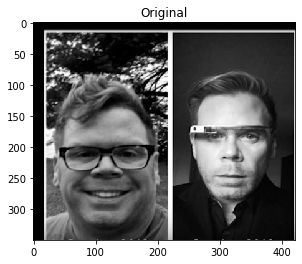

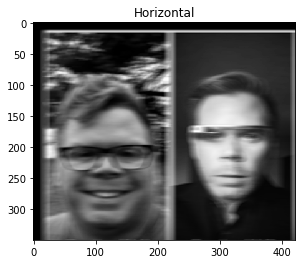

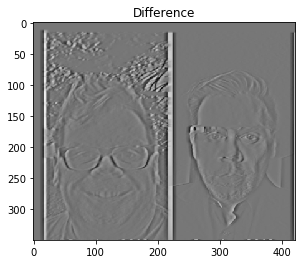

In [5]:
im = io.imread("images/face.png")#load image
im = col.rgb2gray(im)#gray image
#creating mask
mask_h1d=([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],)
mask_h1d /= np.sum(mask_h1d)#normalize

conv_im = sci.ndimage.convolve(im,mask_h1d)#convolved image


#plotting
plt.title('Original')     
plt.imshow(im,cmap='gray')
plt.show()

plt.title('Horizontal')
plt.imshow(conv_im,cmap='gray')
plt.show()

plt.title('Difference')
plt.imshow(im-conv_im,cmap='gray')
plt.show()


#We found that convolution smooths the image. We can smooth in different directions based on the mask







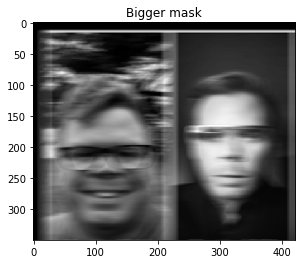

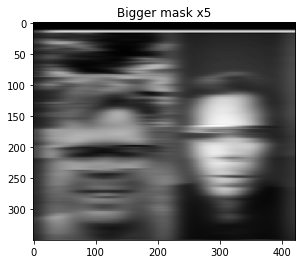

In [6]:
#experiments

mask_h1d=([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],)#bigger mask
mask_h1d /= np.sum(mask_h1d)#normalize

conv_im = sci.ndimage.convolve(im,mask_h1d)#convolved image

plt.title('Bigger mask')
plt.imshow(conv_im,cmap='gray')
plt.show()

for i in range(4):
    conv_im = sci.ndimage.convolve(conv_im,mask_h1d)
plt.title('Bigger mask x5')#convolve 5 times
plt.imshow(conv_im,cmap='gray')
plt.show()
#More convolution = Smoothier!
#Bigger Mask more Blurr



c) Convolve the image with a vertical one-dimensional mask. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

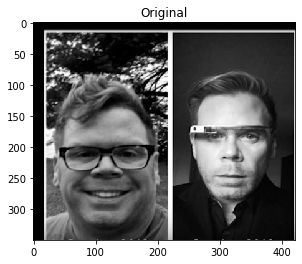

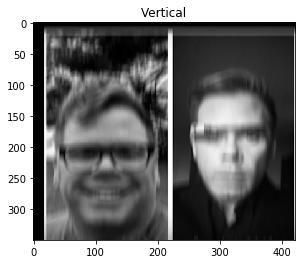

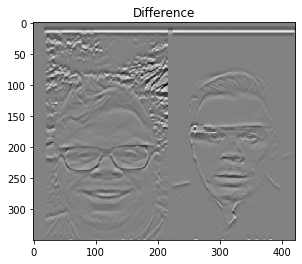

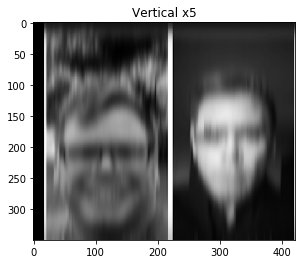

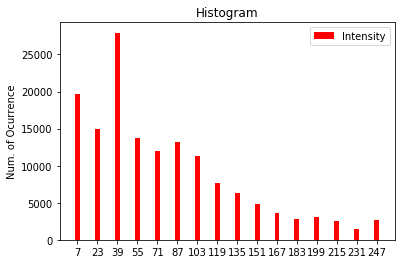

In [7]:
im = io.imread("images/face.png")#load image
im = col.rgb2gray(im)
#vertical 1d mask
mask_v1d = np.zeros((15,15))
mask_v1d[:,7:8] = 1.

mask_v1d /= np.sum(mask_v1d)#normalize

conv_im2 = sci.ndimage.convolve(im,mask_v1d)#convolution

#plotting
plt.title('Original')
plt.imshow(im,cmap='gray')
plt.show()

plt.title('Vertical')
plt.imshow(conv_im2,cmap='gray')
plt.show()

plt.title('Difference')
plt.imshow(im - conv_im2,cmap='gray')
plt.show()

for i in range(4):
    conv_im2 = ndimage.convolve(conv_im2,mask_v1d)
plt.title('Vertical x5')
plt.imshow(conv_im2,cmap='gray')
plt.show()

histogram = np.asarray(ex.histogram(conv_im2,16))

plot_histo(histogram)

#We see how that blur is apllied vertically instead of horizontally

d) Convolve the original image with a uniform `two-dimensional` mask of dimensions 15x15 and with all values set to 1. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

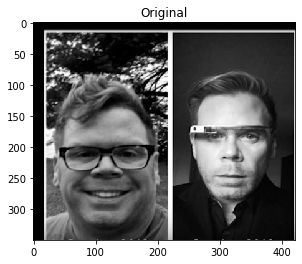

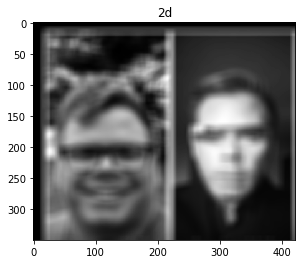

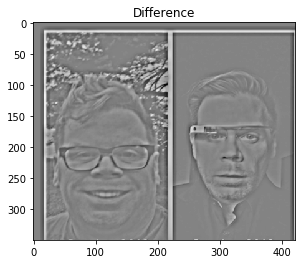

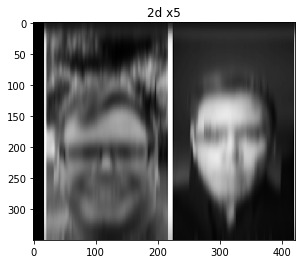

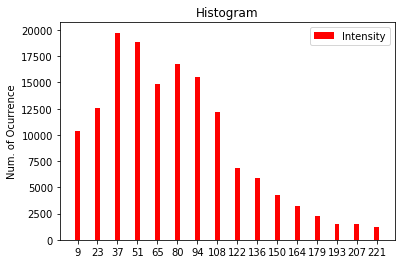

In [8]:
im = io.imread("images/face.png")#load image
im = col.rgb2gray(im)

mask_2d = np.ones((15,15))


mask_2d  /= np.sum(mask_2d )

conv_im3 = sci.ndimage.convolve(im,mask_2d)

plt.title('Original')
plt.imshow(im,cmap='gray')
plt.show()

plt.title('2d')
plt.imshow(conv_im3,cmap='gray')
plt.show()

plt.title('Difference')
plt.imshow(im - conv_im3,cmap='gray')
plt.show()

for i in range(4):
    conv_im3 = ndimage.convolve(conv_im3,mask_2d)
plt.title('2d x5')
plt.imshow(conv_im2,cmap='gray')
plt.show()

histogram = np.asarray(ex.histogram(conv_im3,16))
plot_histo(histogram)

#Now the blur is applied uniformally at all directions of the pic(looks like we are hidding objects)

e) Can we convolve a color image? 

Implement a 3-channel filter, apply it, visualize the 3 images (a, b and c) and comment the results obtained.

Which is the result obtained when applying a single-channel filter channel by channel separately? Visualize again the three images (original, convolved and difference) and compare the results.

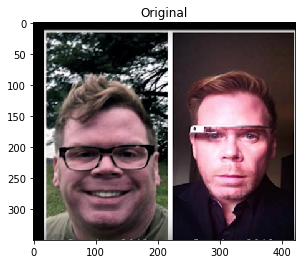

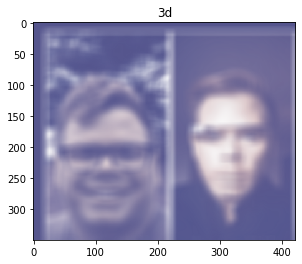

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


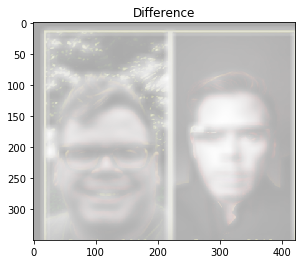

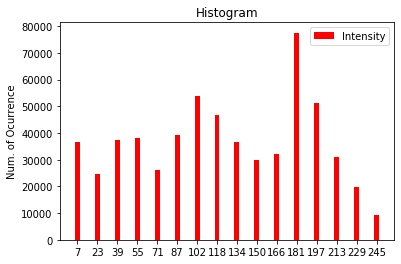

In [9]:
im = io.imread("images/face.png").astype(np.float64)/255.#load image

mask_3d = np.ones((15,15,3))#3d mask

mask_3d  /= np.sum(mask_3d)#normalize

conv_im4 = sci.ndimage.convolve(im,mask_3d)#convolve

#ploting
plt.title('Original')
plt.imshow(im)
plt.show()

plt.title('3d')
plt.imshow(conv_im4)
plt.show()

plt.title('Difference')
plt.imshow(im - conv_im4)
plt.show()

histogram = np.asarray(ex.histogram(conv_im4,16))
plot_histo(histogram)

#we observe how image got brighter and smoothier

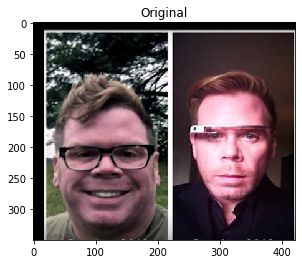

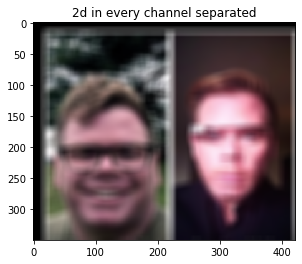

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


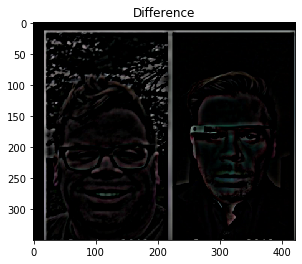

/home/yusepp/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


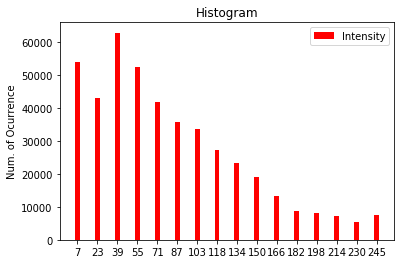

In [10]:
im = io.imread("images/face.png")#load image
im = col.rgba2rgb(im)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]
mask_2d = np.ones((15,15))

mask_2d  /= np.sum(mask_2d)

conv_r = sci.ndimage.convolve(r,mask_2d)
conv_g = sci.ndimage.convolve(g,mask_2d)
conv_b = sci.ndimage.convolve(b,mask_2d)

plt.title('Original')
plt.imshow(im)
plt.show()

conv_im5 = np.zeros(im.shape)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        conv_im5[i,j] = [conv_r[i,j],conv_g[i,j],conv_b[i,j]]

plt.title('2d in every channel separated')
plt.imshow(conv_im5)
plt.show()


plt.title('Difference')
plt.imshow(im - conv_im5)
plt.show()

histogram = np.asarray(ex.histogram(conv_im5,16))
plot_histo(histogram)
#applying by channel 3d convolution we get same efect if we aplied a 2d convolution in grayscale
#we dont get the image brigther

Given a color image (im), what is the difference between ***a*** and ***b*** ?
   
*** a) ***

im_2=np.array(im, dtype='float')


*** b) ***

im_2=np.array(im)


im_2=img_as_float(im_2)

In [11]:
#First one just change the type but does not apply conversion to numbers
#Second one will change type and do the conversion 0-255 to 0-1

f) Change the size of the image a) reducing it 10 times ***and*** b) augmenting it two times. 

Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why. 

Apply the convolution on the three images with the same two dimensional uniform mask and comment the results.
Note: Observe what is the output of the command `resize`.


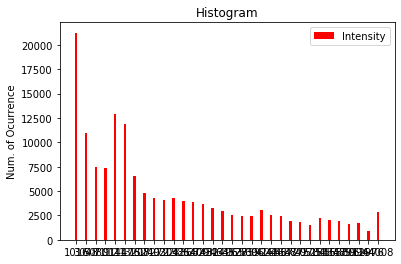

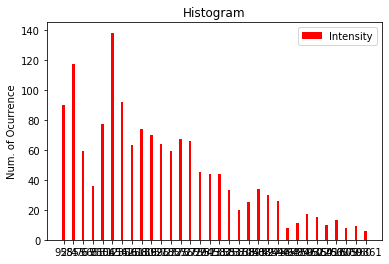

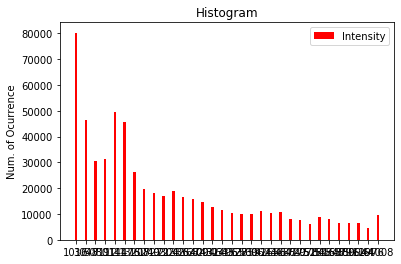

In [12]:
im = io.imread("images/face.png").astype(float)#load image
im = col.rgb2gray(im)
histogram = np.asarray(ex.histogram(im,32))#regular
plot_histo(histogram)

im_reduced = tr.resize(im,(int(im.shape[0]*(1/10)),int(im.shape[1]*(1/10))))#reduced
histogram = np.asarray(ex.histogram(im_reduced,32))
plot_histo(histogram)

im_x2 = tr.resize(im,(int(im.shape[0]*2),int(im.shape[1]*2)))#x2
histogram = np.asarray(ex.histogram(im_x2,32))
plot_histo(histogram)

#increasing or decreasing image changes cardinality at intensity but doesnt look like modifies histogram that much(distribution)


#### 2.2 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the original image of the previous exercise:

- Gaussian kernel with sigma = 1
- Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
- Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: use the skimage.filters function for creating the different filters.

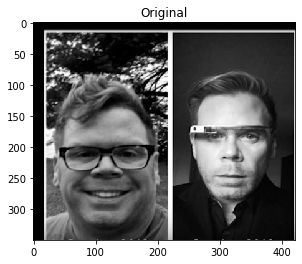

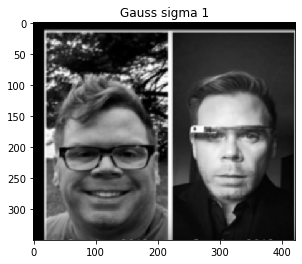

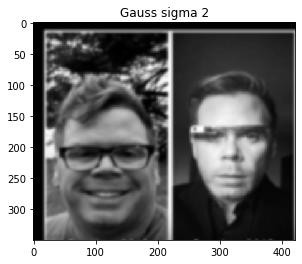

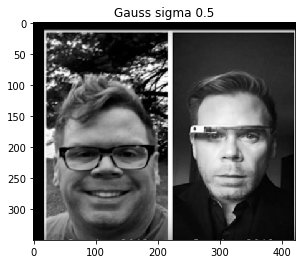

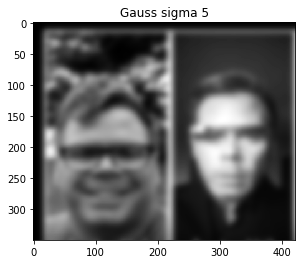

/home/yusepp/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


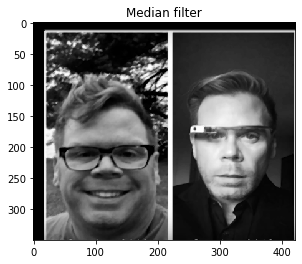

In [13]:
im = io.imread("images/face.png").astype(int)/255#load image
im = col.rgb2gray(im)
plt.title('Original')
plt.imshow(im,cmap='gray')
plt.show()

im_gauss1 = filt.gaussian(im,sigma=1.0)#gaussian with sigma1
plt.title('Gauss sigma 1')
plt.imshow(im_gauss1,cmap='gray')
plt.show()

im_gauss2 = filt.gaussian(im,sigma=2.0)#gaussian with sigma2
plt.title('Gauss sigma 2')
plt.imshow(im_gauss2,cmap='gray')
plt.show()

im_gauss05 = filt.gaussian(im,sigma=0.5)#gaussian with sigma0.5
plt.title('Gauss sigma 0.5')
plt.imshow(im_gauss05,cmap='gray')
plt.show()

im_gauss5 = filt.gaussian(im,sigma=5.0)#gaussian with sigma5
plt.title('Gauss sigma 5')
plt.imshow(im_gauss5,cmap='gray')
plt.show()

im_median = filt.median(im)#median filter
plt.title('Median filter')
plt.imshow(im_median,cmap='gray')
plt.show()

#looks like the bigger the sigma the smoothier/blurry gets
#median filter improve deleting some noise

**(Optional)** Apply the smoothing on some other images and present their results.

### 2.3 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session (roberts, prewitt, sobel and canny). Also, find the optimal parameteres for each of them.

Use subplot and title to visualize the results.

Which is the best countour detection technique? 

Which are the optimal parameters for this image? 

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Hint: use skimage.feature.canny for applying the canny filter

Optional: Superimpose the contours over the image.

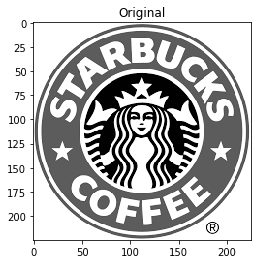

In [14]:
im = io.imread("images/logo.png").astype(int)/255#load image
im = col.rgb2gray(im)
plt.title('Original')
plt.imshow(im,cmap='gray')
plt.show()

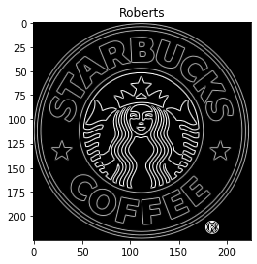

In [15]:
im_rob = filt.roberts(im)
plt.title('Roberts')
plt.imshow(im_rob,cmap='gray')
plt.show()

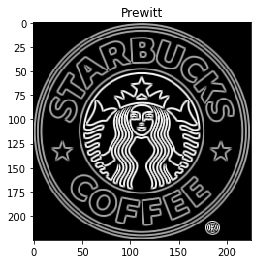

In [16]:
im_prew = filt.prewitt(im)
plt.title('Prewitt')
plt.imshow(im_prew,cmap='gray')
plt.show()

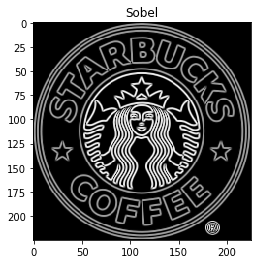

In [17]:
im_sob = filt.sobel(im)
plt.title('Sobel')
plt.imshow(im_sob,cmap='gray')
plt.show()

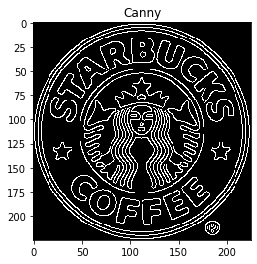

In [18]:
im_can = feat.canny(im)
plt.title('Canny')
plt.imshow(im_can,cmap='gray')
plt.show()

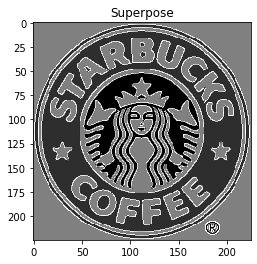

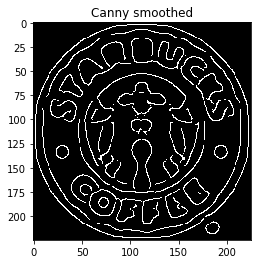

In [19]:
#IMO The best result its the prewitt/sobel. Canny maybe take edges to thick and lost info.
#I tried to apply a mask using filters but always got error.

#Superpose
plt.title('Superpose')
plt.imshow(im + im_can,cmap='gray')
plt.show()

#smooth before detect we lose information
im_can = filt.gaussian(im,sigma=4)
im_can = feat.canny(im_can)
plt.title('Canny smoothed')
plt.imshow(im_can,cmap='gray')
plt.show()

b)	Repeate the experiment with other images, you can use the ones included in the folder **images**. Comment if the parameters need to be changed for the different images.

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

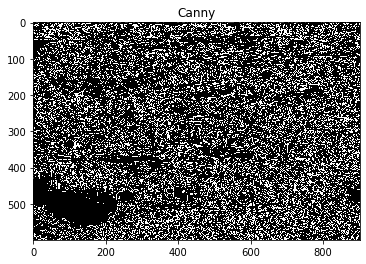

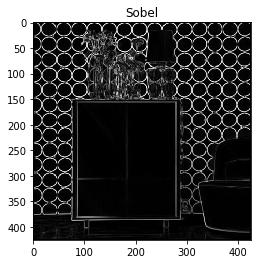

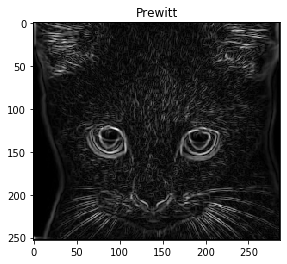

In [20]:
im1 = io.imread("images/casa.jpg").astype(int)/255#load image
im1 = col.rgb2gray(im1)
im2 = io.imread("images/buffet.jpg").astype(int)/255#load image
im2 = col.rgb2gray(im2)
im3 = io.imread("images/cat.jpg").astype(int)/255#load image
im3 = col.rgb2gray(im3)
#filter with different images
im1 = feat.canny(im1)
plt.title('Canny')
plt.imshow(im1,cmap='gray')
plt.show()

im2 = filt.sobel(im2)
plt.title('Sobel')
plt.imshow(im2,cmap='gray')
plt.show()

im3 = filt.prewitt(im3)
plt.title('Prewitt')
plt.imshow(im3,cmap='gray')
plt.show()
#with canny we cant see the house reads too much info
#others work well with cat and decorations

d) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.4 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images, compute the hybrid image and visualize it.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

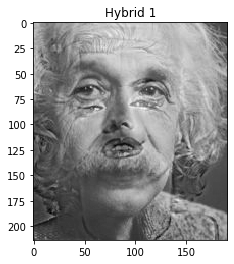

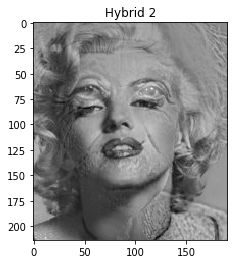

In [21]:
i1 = io.imread("images/Einstein.jpg").astype(float)
i2 = io.imread("images/monroe.jpg").astype(float)
L1 = filt.gaussian(i1,sigma=0.05)#low filters
L2 = filt.gaussian(i2,sigma=2.5)
H1 = i1 - L1#substracting im - low = Highs
H2 = i2 - L2

hybrid1 = L1 + H2#apllying hybrid

plt.title('Hybrid 1')
plt.imshow(hybrid1,cmap='gray')
plt.show()
#same but changing images order
L1 = filt.gaussian(i1,sigma=2.5)
L2 = filt.gaussian(i2,sigma=0.001)
H1 = i1 - L1
H2 = i2 - L2

hybrid2 = L2 + H1

plt.title('Hybrid 2')
plt.imshow(hybrid2,cmap='gray')
plt.show()
#we apply hybrid with 2 options , Hybrid 2 is better aproach for monroe (we can see einstein too!)


b) Combine both hybrid images and visualize them. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. Additionally, rescale the image to different size and comment the results. Present the different visualizations of the experiment performed.

Optional : compute hybrid images from other images. Apply it over color images.

## 2.5 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg



In [ ]:
#load collection , apply gaussian in every item , start animation and define update function
#200 frames each frame 5ms
#for some reason first execution does not work but next ones yeah
seq = io.ImageCollection('images/bigbangcollection/*.png')
images = []
for image in seq:
    images.append(filt.gaussian(image, sigma=6.5,multichannel=True))
    
%matplotlib nbagg
i=0
fig = plt.figure()
im = plt.imshow(images[i],cmap='gray', animated=True)

def update(i):
    im.set_array(images[i])
    return im

ani = FuncAnimation(fig, update, interval=5, blit=False, frames=200)

## Delivery

Compressed file **P2_Student1_Student2.zip** that includes:
- The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P2.zip.

**Deadline (Campus Virtual): October 15, 11:00 p.m.** 
